<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/4-1%20%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **로지스틱 회귀**

## **데이터 준비**

데이터를 준비하겠습니다.

In [4]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

print(fish.head())
print()
print(fish.info())

  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB
None


판다스의 `unique()` 메서드를 사용하여 생선 종류에 대한 고유값을 출력하겠습니다.

In [5]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


생선 종류를 예측하고 분류하는 문제입니다. 'Species' 열을 제외한 나머지 열 5개를 입력 데이터로 만들고, 'Species' 열을 타깃으로 만들겠습니다. 참고로 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 **다중 분류(multi-class classification)**라고 합니다. **이진 분류(binary classification)**에서는 양성 클래스와 음성 클래스를 1과 0으로 지정하여 데이터를 만들었으나, 사이킷런에서는 문자열로 된 타깃 값을 그대로 사용할 수 있습니다.

In [8]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish[['Species']].to_numpy()

print(f'fish_input[:5]:\n {fish_input[:5]}')
print()
print(f'fish_target[:5]:\n {fish_target[:5]}')

fish_input[:5]:
 [[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]

fish_target[:5]:
 [['Bream']
 ['Bream']
 ['Bream']
 ['Bream']
 ['Bream']]


훈련 세트와 테스트 세트로 나누겠습니다.

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

표준화 전처리하겠습니다. 참고로 `train_input` 하나만 훈련하면 됩니다.

In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## **k-최근접 이웃 분류기**

### **k-최근접 이웃 분류기의 확률 예측**

먼저 `KNeighborsClassifier` 클래스 객체로 훈련 세트를 훈련하고 점수를 확인하겠습니다.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(f'훈련 세트 점수:   {kn.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {kn.score(test_scaled, test_target)}')

훈련 세트 점수:   0.8907563025210085
테스트 세트 점수: 0.85


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


타깃값을 그대로 사이킷런 모델에 적용하면 `pd,unique(fish['Species'])`로 출력했던 순서와 다르게 자동으로 알파벳 순으로 정렬됩니다. 정렬된 타깃값은 `classes_` 속성에 저장됩니다.

In [14]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


생선 순서가 본래 타깃값과 다르게 정렬됐습니다. 다만 `predict()` 메서드에 `test_scaled` 값을 넣으면 타깃값으로 예측을 출력합니다.

In [15]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


`predict_proba()` 메서드를 사용하여 클래스별 확률값을 출력하겠습니다. 

In [28]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])

print(f'저장된 속성 순서: {kn.classes_}')
print()
print(f'클래스별 확률값:\n{np.round(proba, 4)}')
print()
print(f'예측값: {kn.predict(test_scaled[:5])}')

저장된 속성 순서: ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']

클래스별 확률값:
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]

예측값: ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


`kn.classes_` 속성에 저장된 값의 순서로서 첫 번째 열은 'Bream'에 대한 확률값, 두 번째 열은 'Parkki'에 대한 확률값을 의미합니다. 첫 번째 샘플은 세 번째 속성인 'Perch'의 확률값이 1이므로 'Perch'라고 예측했습니다. 네 번째 샘플은 세 번째 속성인 'Perch'의 확률값이 0.6667이고, 다섯 번째 속성인 'Roach'의 확률값이 0.3333이므로 확률값이 더 높은 'Perch'로 예측했습니다.

예측이 얼마나 맞는지 일일이 출력해 보겠습니다. 네 번째 샘플의 최근접 이웃의 클래스를 확인하겠습니다.

In [29]:
distance, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[[['Roach']
  ['Perch']
  ['Perch']]]


'Perch'가 최근접 이웃 3개 중 2개와 인접하여 'Perch'로 예측했습니다. 'Roach'는 1개만 인접하므로 기각됐습니다. 최근접 이웃 3개만 사용하므로 가능한 확률값은 $0/3$ ~ $3/3$입니다.

## **로지스틱 회귀**

**로지스틱 회귀(logistic regression)**는 이름과는 달리 분류 모델입니다. `sklearn.linear_model` 패키지의 `LogisticRegression` 클래스를 사용합니다.

로지스틱 회귀는 선형 회귀와 동일하게 선형 방정식을 학습합니다. 예를 들면 아래와 같습니다.

$$z = a \times (Weight) + b \times (Length) + c \times (Diagonal) + d \times (Height) + e \times (Width) + f$$

여기서 $a$, $b$, $c$, $d$, $e$는 계수이고, $f$는 절편입니다. $z$는 어떤 값도 가능하지만 확률값이 되려면 0과 1 사잇값이어야 합니다. $z$가 아주 큰 음수일 때 0이 되고, 아주 큰 양수일 때 1이 되도록 바꾸려면 **시그모이드 함수(sigmoid function)(=로지스틱 함수(logistic function))**를 사용합니다. 시그모이드 함수의 수식은 아래와 같습니다.

$$\phi = \frac{1}{1+e^{-z}}$$

선형 방정식의 출력 $z$의 음수를 사용하여 자연 상수 $e$를 거듭제곱하고 1을 더한 값의 역수입니다. $z$가 무한하게 큰 음수이면 0에 가까워지고, $z$가 무한하게 큰 양수이면 1에 가까워집니다. $z$가 0이면 0.5입니다. 더 자세한 설명은 [링크](https://ko.wikipedia.org/wiki/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C_%ED%95%A8%EC%88%98)를 참고하시기 바랍니다.

시그모이드 함수 그래프를 그리겠습니다. -5 ~ 5 사이를 0.1 간격으로 정하여 배열 $z$를 만들고, 다음 $z$의 위치마다 시그모이드 함수를 계산하겠습니다.

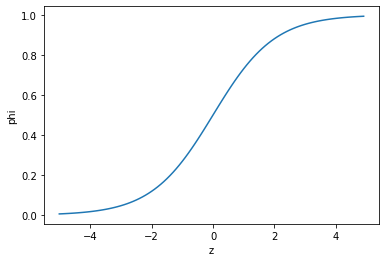

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# -5 ~ 5 범위를 0.1 간격으로 만듭니다.
z = np.arange(-5, 5, 0.1)

# `exp()` 메서드로 지수 함수를 계산합니다.
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')

plt.show()

위에서 설명한 대로 $z$가 무한하게 큰 음수이면 0에 가까워지고, $z$가 무한하게 큰 양수이면 1에 가까워집니다. $z$가 0이면 0.5입니다. 이진 분류의 경우 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단합니다. 참고로 사이킷런의 경우 0.5는 음성 클래스로 판단합니다.

### **이진 분류 수행하기**

#### **불리언 인덱싱으로 특정 샘플 고르기**

불리언 인덱싱을 사용하여 도미(Bream)와 빙어(Smelt) 행만 고르겠습니다. 'Bream'인 행과 'Smelt'인 행을 비교 연산자인 OR(`|`)을 사용하여 합치고 해당하는 생선을 `True`로 출력하겠습니다.

In [50]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
print(bream_smelt_indexes[:5])

[[ True]
 [False]
 [ True]
 [False]
 [False]]


2차원 리스트(119, 1)가 만들어졌습니다. 2차원 리스트로는 불리언 인덱싱을 할 수 없습니다. 1차원 리스트(119,)로 줄여야 합니다. `reshape()`, `flatten()`, `ravel()` 함수를 사용하여 1차원으로 줄일 수 있습니다.

In [52]:
bream_smelt_indexes = bream_smelt_indexes.reshape(-1)
print(bream_smelt_indexes[:5])

[ True False  True False False]


1차원 리스트로 도미(Bream)와 빙어(Smelt) 행만 고르겠습니다.

In [53]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
print(train_bream_smelt[:5])
print(target_bream_smelt[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]]
[['Bream']
 ['Smelt']
 ['Bream']
 ['Bream']
 ['Bream']]


#### **로지스틱 회귀 모델 훈련하기**

골라낸 데이터로 로지스틱 회귀 모델을 훈련하겠습니다.

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

처음 5개 샘플을 예측하고 예측 확률값을 확인하겠습니다.

In [60]:
print(f'예측값: {lr.predict(train_bream_smelt[:5])}')
print()
print(f'예측 확률값:\n{lr.predict_proba(train_bream_smelt[:5])}')

예측값: ['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']

예측 확률값:
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [56]:
print(lr.classes_)

['Bream' 'Smelt']


이진 분류이므로 알파벳순인 'Bream'은 음성 클래스(0)이고, 'Smelt'는 양성 클래스(1)입니다. 'Bream'을 양성 클래스로 사용하려면 'Bream'의 타깃값을 1로 만들고 나머지는 0으로 만들면 됩니다.

##### **시그모이드 함수에 적용하여 확률 얻기**

로지스틱 회귀가 학습한 계수를 확인하겠습니다.

In [61]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


로지스틱 회귀 모델이 학습한 방정식은 아래와 같습니다.

$$z = -0.404 * Weight - 0.576 * Length - 0.663 * Diagonal - 1.013 * Height - 0.732 * Width - 2.161$$

선형 회귀와 비슷한 형태입니다.

`LogisticRegression` 클래스의 `decision_function()` 메서드로 양성 클래스에 대한 $z$ 값을 계산하겠습니다.

In [62]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


$z$ 값을 시그모이드 함수에 적용하여 확률을 얻겠습니다. 사이파이(scipy) 라이브러리의 `expit()` 메서드는 시그모이드 함수를 구하는 메서드입니다. `1 / (1 + np.exp(-z))`로 구하는 것보다 편리하고 안전합니다.

In [63]:
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


`predict_proba()` 메서드가 출력한 두 번째 열의 값(양성 클래스)과 동일합니다.

### **다중 분류 수행하기**

#### **로지스틱 회귀 모델 훈련하기**

이번에는 7종 생선 모두를 분류하겠습니다. 다중 분류는 이진 분류 과정과 크게 다르지 않습니다. 먼저 `LogisticRegression` 클래스가 가진 매개변수를 설명하겠습니다.

- `max_iter`: 반복 횟수를 지정하는 매개변수입니다. `LogisticRegression` 클래스는 반복적인 알고리즘을 사용합니다. 기본값은 `100`입니다.

- `C`: 규제 강도를 제어하는 매개변수입니다. 릿지 회귀처럼 계수의 제곱을 규제합니다(L2 규제). 릿지 회귀의 `alpha` 매개변수와 반대로 `C` 매개변수는 값이 작을수록 규제가 커집니다. 기본값은 `1`입니다.

- `penalty`: 규제 방식을 선택하는 매개변수입니다. L2 규제(릿지 방식)과 L1 규제(라쏘 방식)을 선택할 수 있습니다. 기본값은 `l2`입니다.

- `solver`: 사용할 알고리즘을 선택하는 매개변수입니다. 기본값은 `lbfgs`입니다. 확률적 평균 경사 하강법인 `saga`를 선택할 수 있습니다.

`LogisticRegression` 클래스로 다중 분류 모델을 훈련하겠습니다. 규제를 완화하기 위해 `C` 매개변수에 `20`을 지정하고, 충분히 훈련하도록 `max_iter` 매개변수에 `1000`을 지정하겠습니다.

In [65]:
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=20, max_iter=1000)

점수를 확인하겠습니다.

In [67]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


테스트 세트의 첫 5개 샘플을 예측하겠습니다.

In [68]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


예측 확률값을 출력하겠습니다.

In [73]:
print(lr.classes_)
print()
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, 3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


##### **소프트맥스 함수에 적용하여 확률 얻기**

계수를 출력하겠습니다.

In [76]:
print(lr.coef_)
print()
print(lr.intercept_)

[[-1.49002911 -1.02919221  2.59351113  7.70354318 -1.20068079]
 [ 0.19619256 -2.0106062  -3.77982687  6.50490143 -1.99486463]
 [ 3.56278472  6.34361428 -8.48973364 -5.75756295  3.79309039]
 [-0.10458533  3.60316654  3.93067417 -3.61731229 -1.75070607]
 [-1.40059104 -6.07505264  5.25967743 -0.87222909  1.86043657]
 [-1.38528628  1.49217379  1.3922839  -5.67732641 -4.40095877]
 [ 0.62151448 -2.32410356 -0.90658611  1.71598614  3.69368329]]

[-0.09204845 -0.26290731  3.25101057 -0.14742485  2.65496057 -6.78780765
  1.38421712]


특성 5개를 사용했으므로 `coef_`의 열은 5개입니다. 클래스가 7개이므로 행이 7개이고, 이는 $z$를 7개만큼 계산한 것입니다. 다중 분류는 클래스마다 $z$값을 하나씩 계산합니다. 가장 높은 $z$값을 출력하는 클래스가 예측 클래스(예측값, 타깃)가 됩니다.

이진 분류는 시그모이드 함수를 사용하여 선형 방정식 하나의 출력값 $z$를 0 ~ 1 사이 확률값으로 압축했지만, 다중 분류는 **소프트맥스(softmax) 함수**를 사용하여 여러 선형 방정식의 출력값 $z$를 0 ~ 1 사이 확률값으로 압축합니다. 지수 함수를 사용하므로 **정규화된 지수 함수**라고도 합니다.

소프트맥스 함수의 계산법을 설명하겠습니다. 먼저 $z$ 값 7개의 이름을 $z1$ ~ $z7$로 정의하겠습니다. $z1$ ~ $z7$ 값을 사용하여 지수 함수 $e^{z1}$ ~ $e^{z7}$을 계산하여 모두 더한 값을 $e\_sum$으로 정하겠습니다.

$$e\_sum = e^{z1} + e^{z2} + e^{z3} + e^{z4} + e^{z5} + e^{z6} + e^{z7}$$

그리고 나서 $e^{z1}$ ~ $e^{z7}$을 각각 $e\_sum$으로 나누면 됩니다.

$$s1 = \frac{e^{z1}}{e\_sum}, s2 = \frac{e^{z2}}{e\_sum}, \cdots, s7 = \frac{e^{z7}}{e\_sum}$$

마지막으로 $s1$ ~ $s7$까지 더하면 분자와 분모가 같아지면서 1이 됩니다. 즉 생선 7개의 확률값을 모두 더하면 1입니다.

`decision_function()` 메서드로 $z1$ ~ $z7$의 값을 구하고 소프트맥스 함수를 사용하여 확률로 바꾸겠습니다.

In [77]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [78]:
from scipy.special import softmax

 # `axis` 매개변수를 1로 지정하여 각 행(샘플)에 대해 계산합니다.
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


위에서 `predict_proba`로 예측한 결과와 같은 값을 출력했습니다.

In [79]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
